# Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max scaling, also known as min-max normalization, is a data preprocessing technique used to transform numerical features in a dataset to a specific range, typically between 0 and 1. 

The purpose of Min-Max scaling is to rescale the data so that all feature values are proportionally adjusted, preserving their relative relationships, while ensuring that they fall within a specific range defined by a minimum and maximum value.

### Here's how Min-Max scaling is performed:

1. Find the minimum (min_val) and maximum (max_val) values of the feature we want to scale within the dataset.

2. For each data point (x) in the feature, apply the following transformation:

Scaled Value (x_scaled) = (x - min_val) / (max_val - min_val)

This formula linearly maps the original value **'x' to a new value 'x_scaled'** that falls within the range [0, 1].

### Example :

Suppose we have a dataset containing the ages of people - from 20 to 60 and
their corresponding incomes -from rs.20,000 to rs.1,00,000. 

Find the minimum and maximum values:

For age: min_age = 20, max_age = 60

For income: min_income = rs 20,000, max_income = rs.1,00,000

Apply Min-Max scaling to each data point:

Age: If someone is 30 years old,
Age_scaled = (30 - 20) / (60 - 20) = 0.25

Income: If someone earns rs.50,000,
Income_scaled = (rs.50,000 - rs.20,000) / (rs.1,00,000 - rs.20,000) = 0.5

# Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

The Unit Vector technique, also known as vector normalization or feature scaling using unit vectors, is a data preprocessing method that scales numerical features to have a unit norm, typically a Euclidean norm of 1.

This technique is primarily used in situations where the direction or angle of the data points relative to the origin is more important than their absolute magnitudes. 

Unit Vector scaling doesn't change the relative relationships between data points but ensures that each data point falls on the surface of a unit sphere or hypersphere.

### Differences between Unit Vector Scaling and Min-Max Scaling:

1. Goal:
Unit Vector Scaling: Normalize to a unit magnitude, placing points on a unit hypersphere.
Min-Max Scaling: Rescale features to a specified range (typically 0 to 1).

2. Impact on Magnitudes:
Unit Vector Scaling: Replaces magnitudes with 1, preserving direction.
Min-Max Scaling: Preserves magnitudes and relative relationships but adjusts the scale.

3. Use Cases:
Unit Vector Scaling: For direction-sensitive algorithms like clustering and dimensionality reduction.
Min-Max Scaling: For leveling feature scales in various algorithms, preventing dominance by large ranges.



In [5]:
import seaborn as sns

In [6]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
import pandas as pd
from sklearn.preprocessing import normalize


In [8]:
df_vector = pd.DataFrame(normalize(df[['sepal_length']]), columns=['sepal_length_normalized'])


In [9]:
a=df['sepal_length']

In [10]:
pd.concat([a,df_vector],axis=1)

,sepal_length,sepal_length_normalized
0,5.1,1.0
1,4.9,1.0
2,4.7,1.0
3,4.6,1.0
4,5.0,1.0
...,...,...
145,6.7,1.0
146,6.3,1.0
147,6.5,1.0
148,6.2,1.0


# Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a dimensionality reduction technique used in data analysis and machine learning to reduce the number of features (variables) in a dataset while preserving the most important information. PCA achieves this reduction by transforming the original features into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original features and are ordered by their ability to explain the variance in the data, with the first principal component explaining the most variance, the second explaining the second most, and so on.

### PCA in dimensionality reduction:

1. Standardization: Scale data to have zero mean and unit variance.

2. Covariance Matrix: Calculate the matrix to measure feature relationships.

3. Eigenvalue Decomposition: Find eigenvectors (directions) and eigenvalues (variance) of the covariance matrix.

4. Select Principal Components: Sort by eigenvalue magnitude, choosing components to reduce dimensionality.

5. Projection: Use selected components to project data, preserving variance.

6. Reduced Dataset: The result is a lower-dimensional dataset, aiding analysis and modeling.

In [43]:

import numpy as np

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
# Standardize the data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply PCA with two components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_standardized)

# Create a DataFrame for the reduced dataset
df_reduced = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])

print(df_reduced.head())

        PC1       PC2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


# Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used for feature extraction. It's a statistical method that aims to reduce the number of features in a dataset while preserving as much of the original variance as possible. Feature extraction is the process of transforming the data from its original high-dimensional space into a lower-dimensional space, often to simplify analysis, reduce noise, or improve computational efficiency.

### Relationship between PCA and Feature Extraction:

1. Dimensionality Reduction: Both PCA and feature extraction aim to reduce the dimensionality of a dataset. In high-dimensional spaces, datasets can be noisy, computationally expensive, and may suffer from the curse of dimensionality. Feature extraction techniques like PCA help mitigate these issues by reducing the number of features while retaining the most important information.

2. Information Preservation: PCA tries to preserve as much variance in the data as possible while reducing the dimensionality. Similarly, feature extraction methods aim to retain the essential information in the data, which can be critical for downstream analysis tasks like classification or clustering.

### PCA (Principal Component Analysis) in brief:

1. Standardization: Scale all variables to the same magnitude (mean-centered, unit variance).

2. Covariance Matrix: Compute the covariance matrix to understand variable relationships.

3. Eigenvalue Decomp.: Find eigenvalues and eigenvectors to determine variance explained.

4. Select Principal Components: Rank eigenvectors by eigenvalues; top ones capture most variance.

5. Dimensionality Reduction: Choose the top N components to reduce dimensionality.

6. Data Reconstruction: Optionally, project data back to original space with some loss, useful for visualization or analysis.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [22]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (species labels)

# Step 1: Standardize the data (mean-centered and scaled to unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)


Explained Variance Ratio:
[0.72962445 0.22850762 0.03668922 0.00517871]


In [23]:
# Step 5: Select Principal Components (e.g., retain 2 components)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

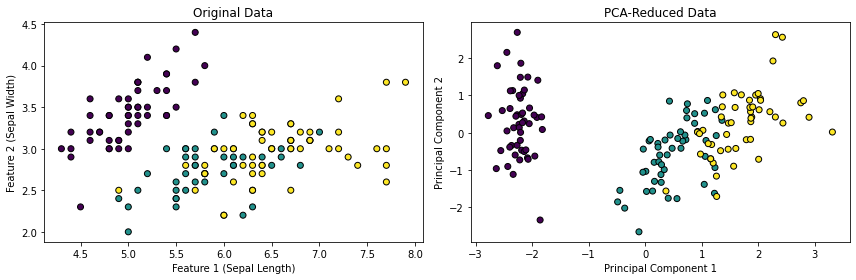

In [24]:
import matplotlib.pyplot as plt

# Visualize the original data (first two features)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.title('Original Data')

# Visualize the PCA-reduced data (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Reduced Data')

plt.tight_layout()
plt.show()


# Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

Min-Max scaling, also known as normalization, is a data preprocessing technique commonly used in machine learning to transform numerical features within a specific range. It scales the data to a range between 0 and 1 while preserving the relationships and distribution of the original data. This can be particularly useful when dealing with features that have different scales or units, as it ensures that all features contribute equally to the modeling process.

### Apply Min-Max Scaling:
For each numerical feature (e.g., price, rating, and delivery time), perform the following steps:
1. Find the minimum (min_val) and maximum (max_val) values of the feature in your dataset.

2. Use the Min-Max scaling formula to scale each feature value (x) within the specified range (a to b):

$$scaled value = \frac{x - min val} {max val - min val} * (b - a) + a$$

Here, 'a' is the minimum value of the desired range, and 'b' is the maximum value of the desired range (usually 0 and 1 for Min-Max scaling).

In [26]:

import pandas as pd
d1 = {
    'food_item':['paneer','bread','ham','honey'],
    'price':[1500,1300,2150,1200],
    'delivery_time':[20,10,15,12]
}

df = pd.DataFrame(d1)
df

,food_item,price,delivery_time
0,paneer,1500,20
1,bread,1300,10
2,ham,2150,15
3,honey,1200,12


In [28]:
# Extract the numerical features
X = df[['price','delivery_time']]
X

,price,delivery_time
0,1500,20
1,1300,10
2,2150,15
3,1200,12


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),
                        columns=X.columns)
X_scaled

,price,delivery_time
0,0.315789,1.0
1,0.105263,0.0
2,1.000000,0.5
3,0.000000,0.2


# Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(0)
num_samples = 1000

# Mock financial data
revenue = np.random.uniform(10, 100, num_samples) * 1000  
expenses = np.random.uniform(5, 50, num_samples) * 1000   
profit_margin = (revenue - expenses) / revenue

# Mock market trends
market_sentiment = np.random.uniform(0, 1, num_samples)   
volatility = np.random.uniform(0, 0.2, num_samples)       

# Create a DataFrame
data = pd.DataFrame({
    'Revenue': revenue,
    'Expenses': expenses,
    'Profit_Margin': profit_margin,
    'Market_Sentiment': market_sentiment,
    'Volatility': volatility
})

In [6]:
data

,Revenue,Expenses,Profit_Margin,Market_Sentiment,Volatility
0,59393.215353,31679.612185,0.466612,0.811518,0.082792
1,74367.042974,5452.866305,0.926676,0.476084,0.125924
2,64248.703846,26412.178814,0.588907,0.523156,0.155717
3,59039.486470,36894.667592,0.375085,0.250521,0.170312
4,48128.931941,6978.894441,0.854996,0.605043,0.163283
...,...,...,...,...,...
995,18790.873070,40607.669850,-1.161032,0.941687,0.069928
996,56342.998174,37453.915082,0.335252,0.546133,0.086975
997,94457.081952,26604.851322,0.718339,0.323614,0.166001
998,30578.189588,33973.881653,-0.111049,0.813545,0.186561


In [7]:
# Standardize the data (mean-center and scale to unit variance)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled.shape

(1000, 5)

In [8]:
data_scaled

array([[ 0.18201026,  0.27271465,  0.27970025,  1.0673943 , -0.24372926],
       [ 0.75453787, -1.67677714,  0.97639105, -0.102405  ,  0.51002823],
       [ 0.36766093, -0.11882527,  0.46489568,  0.06175462,  1.03069219],
       ...,
       [ 1.52268497, -0.1045035 ,  0.66089909, -0.63413216,  1.21041013],
       [-0.91973864,  0.44325276, -0.59507283,  1.07446171,  1.56972672],
       [ 0.62360747, -0.0320341 ,  0.49871274,  0.66941714, -0.61290516]])

In [9]:
# Apply PCA for dimensionality reduction

from sklearn.decomposition import PCA
n_components = 2  
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

# Display the first few rows of the reduced-dimension dataset
print(pd.DataFrame(data_pca, columns=['PC1', 'PC2']).head())

        PC1       PC2
0 -0.118910  0.248858
1 -1.847234  0.765721
2 -0.580057  0.685851
3  0.046874  0.089932
4 -1.141498  1.702185


# Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define your dataset
data = np.array([1, 5, 10, 15, 20]).reshape(-1, 1)

# Create a MinMaxScaler instance and specify the desired range (-1 to 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)

# The scaled_data variable now contains your scaled values in the range of -1 to 1
print(scaled_data)


[[-1.        ]
 [-0.57894737]
 [-0.05263158]
 [ 0.47368421]
 [ 1.        ]]


# Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

In [12]:
import numpy as np
from sklearn.decomposition import PCA

# Create a sample dataset
data = np.array([
    [175, 70, 30, 0, 120],
    [160, 55, 25, 1, 130],
    [185, 80, 40, 0, 140],
    [170, 65, 35, 1, 125],
    [155, 50, 28, 1, 135]
])

# Step 1: Standardize the data
mean = np.mean(data, axis=0)
stddev = np.std(data, axis=0)
standardized_data = (data - mean) / stddev

# Step 2: Create a PCA instance
pca = PCA()

# Step 3: Fit PCA to the standardized data
pca.fit(standardized_data)

# Step 4: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 5: Determine the number of components to retain based on desired variance threshold
desired_variance_threshold = 0.95  # Adjust this threshold as needed
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_to_retain = np.argmax(cumulative_variance >= desired_variance_threshold) + 1

# Step 6: Retain the selected number of principal components
selected_components = pca.components_[:num_components_to_retain]

# Optionally, you can transform your data to the reduced dimensionality
reduced_data = pca.transform(standardized_data)[:, :num_components_to_retain]

# Print the results
print(f"Number of components to retain: {num_components_to_retain}")
print(f"Explained variance by each component: {explained_variance_ratio}")
print(f"Cumulative explained variance: {cumulative_variance}")


Number of components to retain: 3
Explained variance by each component: [6.95983967e-01 2.18048092e-01 7.68805048e-02 9.08743687e-03
 1.48818636e-34]
Cumulative explained variance: [0.69598397 0.91403206 0.99091256 1.         1.        ]
